___
## Ciência dos Dados - PROJETO 3 - INSPER

___
#### Victor Arruda Niubó

#### Giovanni Pertence Cardoso dos Santos

#### Gustavo Schlieper Tessitore

#### Leonardo Cesari Costa
___

# Previsão da quantidade de views

___

## 1. INTRODUÇÃO

O objetivo do projeto é estimar a quantidade de visualizações que um vídeo terá com base no título, horário de publicação e as tags atribuidas aos vídeos.

___
## 2. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import itertools
import math
import json
import os
from scipy import stats
from scipy.stats import norm

In [20]:
#remove mesagens de aviso do Pandas
pd.options.mode.chained_assignment = None
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/giovannid.santos/Documents/Insper/3_Semestre/CDADOS-DP/cdados_dp/P3


### BASE DE DADOS

In [21]:
# Base de dados dos videos em destaque do youtube US
you_data = pd.read_csv("USvideos.csv")

you_data.drop_duplicates(subset = 'video_id', keep = 'last', inplace = True)

# jason que contém a relação id - categoria
ids = json.loads(open('US_category_id.json').read())


# filtro das variáveis de interesse
you_analysis = you_data.loc[you_data.views|you_data.title|you_data.tags|you_data.category_id,\
                           ['views', 'title', 'tags', 'category_id']]


In [22]:
# separação da string das tags em uma lista de strings
tags_split = you_analysis.tags.str.split(pat = '|')
you_analysis['tags_split'] = tags_split
you_analysis.head()
you_ifn = you_analysis.copy()

In [23]:
# Junta todas as strings em uma lista só para pder fazer um value_counts() e criar um
# dataframe com as tags e as frquencias de cada uma
merged = list(itertools.chain(*you_analysis.tags_split))
contador = pd.DataFrame({'col':merged})
limpino = contador[contador.col != '[none]']
dfl = limpino.col.value_counts().rename_axis('tags').reset_index(name='counts')
dfl = dfl[(dfl['counts'])> 10]

In [44]:
%store dfl

Stored 'dfl' (DataFrame)


In [35]:
# Separa as linhas que contém certa tag

for e in range(len(dfl.tags)):
    var_df = you_analysis[you_analysis['tags'].str.contains(dfl.tags[e])]
    x = list(var_df.index)
    you_analysis[dfl.tags[e]+'_freq'] = 0
    you_analysis.loc[x,[dfl.tags[e]+'_freq']] = {dfl.counts[e]:1}

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


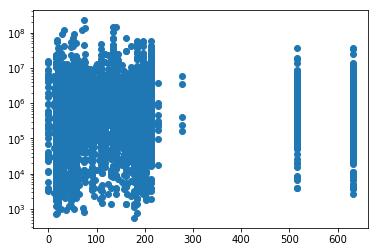

In [36]:
# Cria dataframe das views e frequência máxima
banana = pd.DataFrame()
banana['views'] = you_analysis['views']
banana['max_freq'] = you_analysis.iloc[:,5:].max(axis=1)

# Plota scatter 
ax = plt.gca()
ax.scatter(banana.max_freq, banana.views)
ax.set_yscale('log')

In [37]:
# Transpose no dataframe para poder usar .nlargest()
trans = you_analysis.iloc[:,5:].transpose()

In [45]:
#trans.rename(index=str, columns={e: "vid_{0}".format(e)})
%store trans

Stored 'trans' (DataFrame)


In [39]:
# Cria dicionário com chave de index e valor com top 3 frequências
ind = list(you_analysis.iloc[:,5:].index)
dic = {}
for e in ind:
    dic[e]= trans.nlargest(3,e)[e].sum()


In [46]:
you_ifn['top3_freq']=list(dic.values())
%store you_ifn

Stored 'you_ifn' (DataFrame)


In [41]:
ax.scatter(you_ifn.top3_freq, you_ifn.views)
ax.set_yscale('log')

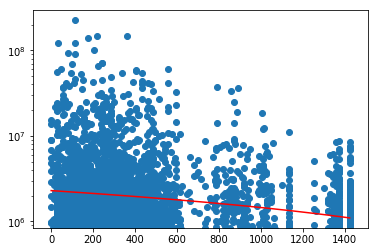

In [42]:
#LEMBRANDO
x = you_ifn.top3_freq
y = you_ifn.views

#beta^0 e beta^1
yb = y.mean()
xb = x.mean()

Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()

b1 = Sxy/Sxx
b0 = yb - b1*xb

x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v

plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.gca().set_yscale('log')


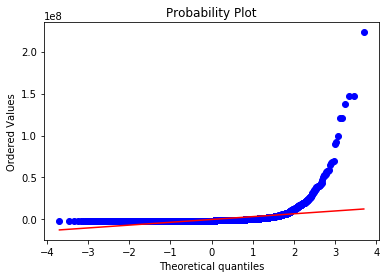

In [43]:
e = y - (b0 + b1*x) # Escreva sua fórmula dos resíduos aqui

stats.probplot(e, dist='norm', plot=plt);


### ANÁLISE DESCRITIVA

___
## C. MODELOS DE PREDIÇÃO

In [ ]:
new_data = pd.DataFrame()
new_data['views'] = you_analysis['views']
new_data['top3_freq'] = you_ifn['top3_freq']


o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

[Esse item depende dos resultados das modelagens anteriores! Organize-os aqui de forma clara!]

___
## E. CONCLUSÃO

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS